In [1]:
# Importing relevant data libraries and FIFA 21 data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv(r"C:\Users\dmtra\OneDrive\Documents\Coding\Data Sources\fifa_21_raw_data.csv", low_memory = False)

In [2]:
# Data cleaning: initial look at dataframe columns, data types, and values
df.info()
pd.set_option('display.max_columns', None)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [3]:
# Establishing ID column as the index and removing duplicate rows
df.set_index('ID', inplace = True)
df.drop_duplicates(inplace = True)

In [4]:
# Splitting the contract column into separate start and end year columns for later analysis
df['Contract Start'] = df['Contract'].astype(str)
df['Contract'] = df['Contract'].str.replace(' ~ ', ',')
df[['Contract Start', 'Contract End']] = df['Contract'].str.split(',', expand = True)

In [5]:
# Adding a potential rating difference column representing the room for rating improvement (potential rating - overall rating)
df['Potential Rating Difference'] = df['POT'] - df['↓OVA']

In [6]:
# Removing unnecessary columns
drop_cols = ['Name', 'photoUrl', 'playerUrl', 'Contract']
df.drop(drop_cols, axis = 1, inplace = True)

In [7]:
# Renaming columns as seen fit (removing extra characters)
new_col_names = {'LongName' : 'Name', '↓OVA' : 'OVA', 'W/F' : 'WF', 'A/W' : 'AW', 'D/W' : 'DW'}
df.rename(columns = new_col_names, inplace = True)

In [8]:
# Reordering columns for organization and priority (more general/overarching info to the left)
new_col_order = ['Name', 'Age', 'Height', 'Weight', 'Nationality', 'Preferred Foot', 'Positions', 'Best Position', 'Joined', 
                 'Club', 'Contract Start', 'Contract End', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'OVA', 'POT', 
                 'Potential Rating Difference', 'BOV', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'AW', 'DW', 
                 'WF', 'SM', 'IR', 'Total Stats', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 
                 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 
                 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 
                 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 
                 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Hits']
df = df[new_col_order]

In [9]:
# Converting the joined column to a date
df['Joined'] = pd.to_datetime(df['Joined'])

In [10]:
# Removing newline characters from the club column
df['Club'] = df['Club'].str.replace('\n', '')

In [11]:
# Converting the height column to numerical values, standardized in centimeters
def convert_height(height):
    if 'cm' in height:
        return int(float(height.replace('cm', '')) * 1)
    else:
        try:
            feet, inches = map(int, height.replace('"', '').split('\''))
            converted_height = feet * 30.48 + inches * 2.54
            return int(converted_height)
        except:
            return int(height)
    
df['Height'] = df['Height'].apply(convert_height)

In [12]:
# Converting the weight column to numerical values, standardized in kilograms
def convert_weight(weight):
    if 'kg' in weight:
        return int(float(weight.replace('kg', '')) * 1)
    elif 'lbs' in weight:
        return int(float(weight.replace('lbs', '')) * 0.454)
    else:
        return int(weight)
    
df['Weight'] = df['Weight'].apply(convert_weight)

In [13]:
# Converting star rating columns to numerical values on a scale of 1-5
df['WF'] = df['WF'].str.replace(r'\D', '', regex = True)
df['SM'] = df['SM'].str.replace(r'\D', '', regex = True)
df['IR'] = df['IR'].str.replace(r'\D', '', regex = True)

df['WF'] = df['WF'].astype(int)
df['SM'] = df['SM'].astype(int)
df['IR'] = df['IR'].astype(int)

In [14]:
# Converting all columns dealing with money into numerical values
df['Value'] = df['Value'].str.slice(1)
df['Wage'] = df['Wage'].str.slice(1)
df['Release Clause'] = df['Release Clause'].str.slice(1)

def convert_money(amount):
    if 'M' in amount:
        return int(float(amount.replace('M', '')) * 1000000)
    elif 'K' in amount:
        return int(float(amount.replace('K', '')) * 1000)
    else:
        return int(amount)
    
df['Value'] = df['Value'].apply(convert_money)
df['Wage'] = df['Wage'].apply(convert_money)
df['Release Clause'] = df['Release Clause'].apply(convert_money)

In [15]:
# Converting the hits column to numerical values
df['Hits'].fillna('0', inplace = True)

def convert_hits(hits):
    if 'K' in hits:
        return int(float(hits.replace('K', '')) * 1000)
    else:
        return int(hits)
    
df['Hits'] = df['Hits'].apply(convert_hits)

In [16]:
# Data analysis: first look at the distributions of all the numerical columns
df.describe()

,Age,Height,Weight,Joined,Value,Wage,Release Clause,OVA,POT,Potential Rating Difference,BOV,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,WF,SM,IR,Total Stats,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Hits
count,18979.000000,18979.000000,18979.000000,18979,1.897900e+04,18979.000000,1.897900e+04,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,25.194109,181.199220,75.018600,2018-09-13 10:27:42.005374464,2.865063e+06,9092.062279,3.962951e+06,65.718636,71.136414,5.417778,66.751726,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934,2.940513,2.364982,1.091628,1595.286949,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.412930,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,22.936720
min,16.000000,155.000000,50.000000,1998-01-01 00:00:00,0.000000e+00,0.000000,0.000000e+00,47.000000,47.000000,0.000000,48.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000,1.000000,1.000000,1.000000,747.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,21.000000,176.000000,70.000000,2018-01-08 12:00:00,4.750000e+05,1000.000000,4.235000e+05,61.000000,67.000000,0.000000,62.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000,3.000000,2.000000,1.000000,1452.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.00000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000
50%,25.000000,181.000000,75.000000,2019-06-25 00:00:00,9.500000e+05,3000.000000,1.000000e+06,66.000000,71.000000,4.000000,67.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000,3.000000,2.000000,1.000000,1627.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.00000,159.000000,52.000000,55.000000,52.000000,53.000000,1

In [17]:
# First look at cleaned data frame
df.head(5)

,Name,Age,Height,Weight,Nationality,Preferred Foot,Positions,Best Position,Joined,Club,Contract Start,Contract End,Loan Date End,Value,Wage,Release Clause,OVA,POT,Potential Rating Difference,BOV,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,AW,DW,WF,SM,IR,Total Stats,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Hits
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,Lionel Messi,33,170,72,Argentina,Left,"RW, ST, CF",RW,2004-07-01,FC Barcelona,2004,2021,NaN,103500000,560000,138400000,93,93,0,93,466,85,92,91,95,38,65,Medium,Low,4,4,5,2231,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,771
20801,C. Ronaldo dos Santos Aveiro,35,187,83,Portugal,Right,"ST, LW",ST,2018-07-10,Juventus,2018,2022,NaN,63000000,220000,75900000,92,92,0,92,464,89,93,81,89,35,77,High,Low,4,5,5,2221,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,562
200389,Jan Oblak,27,188,87,Slovenia,Right,GK,GK,2014-07-16,Atlético Madrid,2014,2023,NaN,120000000,125000,159400000,91,93,2,91,489,87,92,78,90,52,90,Medium,Medium,3,1,3,1413,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,150
192985,Kevin De Bruyne,29,181,70,Belgium,Right,"CAM, CM",CAM,2015-08-30,Manchester City,2015,2023,NaN,129000000,370000,161000000,91,91,0,91,485,76,86,93,88,64,78,High,High,5,4,4,2304,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,207
190871,Neymar da Silva Santos Jr.,28,175,68,Brazil,Right,"LW, CAM",LW,2017-08-03,Paris Saint-Germain,2017,2022,NaN,132000000,270000,166500000,91,91,0,91,451,91,85,86,94,36,59,High,Medium,5,5,5,2175,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,595


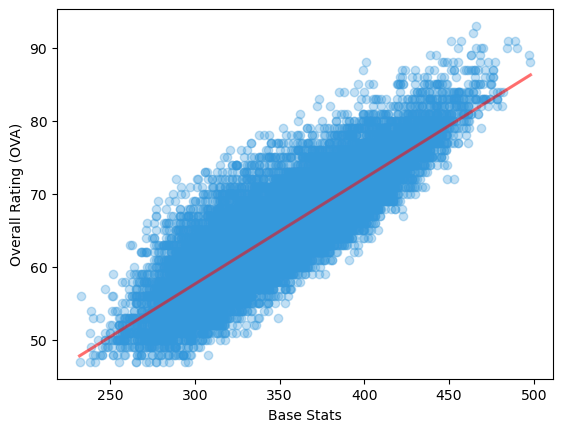

In [18]:
# How does a player's overall rating (OVA) relate to their base stats (Base Stats = PAC + SHO + PAS + DRI + DEF + PHY)?
sns.regplot(x = 'Base Stats', y = 'OVA', data = df, scatter_kws = {'color' : '#3498db', 'alpha' : 0.3}, 
            line_kws = {'color' : 'red', 'alpha' : 0.5})
plt.xlabel('Base Stats')
plt.ylabel('Overall Rating (OVA)')
plt.show()

In [19]:
# Find the players whose overall rating (OVA) is markedly higher/lower than what their base stats would indicate
z_scores = df
z_scores['Base Stats Z Score'] = stats.zscore(z_scores[['Base Stats']])
z_scores['OVA Z Score'] = stats.zscore(z_scores[['OVA']])
z_scores['Z Score Difference'] = (z_scores['Base Stats Z Score'] - z_scores['OVA Z Score']).abs()
z_scores.loc[z_scores['Z Score Difference'] > 2.25, ['Name', 'Age', 'Nationality', 'Best Position', 'Club', 
                                                     'Value', 'OVA', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 
                                                     'DEF', 'PHY', 'Base Stats Z Score', 'OVA Z Score', 
                                                     'Z Score Difference']].sort_values(by = 'Z Score Difference', 
                                                                                        ascending = False)

,Name,Age,Nationality,Best Position,Club,Value,OVA,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Base Stats Z Score,OVA Z Score,Z Score Difference
ID,,,,,,,,,,,,,,,,,
183774,Ryan Bennett,30,England,CB,Wolverhampton Wanderers,1900000,72,289,40,25,46,34,73,71,-1.636460,0.901353,2.537814
120312,Michael Dawson,36,England,CB,Nottingham Forest,250000,69,278,30,33,44,36,71,64,-1.906333,0.470864,2.377196
184190,Romain Thomas,32,France,CB,Angers SCO,4900000,76,321,36,33,54,47,78,73,-0.851378,1.475339,2.326717
251616,David Mota Teixeira Carmo,20,Portugal,CB,SC Braga,4200000,71,292,33,28,42,41,72,76,-1.562859,0.757857,2.320716
195037,Danny Batth,29,England,CB,Stoke City,1300000,70,287,32,23,42,37,70,83,-1.685528,0.614360,2.299888
190547,Kamil Glik,32,Poland,CB,Benevento,3600000,75,317,36,32,45,51,74,79,-0.949513,1.331842,2.281356
136113,Wes Morgan,36,Jamaica,CB,Leicester City,550000,73,306,30,34,41,54,75,72,-1.219385,1.044850,2.264235
205553,Luca Ceppitelli,30,Italy,CB,Cagliari,2500000,73,306,51,33,35,41,76,70,-1.219385,1.044850,2.264235
183640,Christian Strohdiek,32,Germany,CB,SC Paderborn 07,775000,68,277,39,21,38,39,68,72,-1.930866,0.327367,2.258234


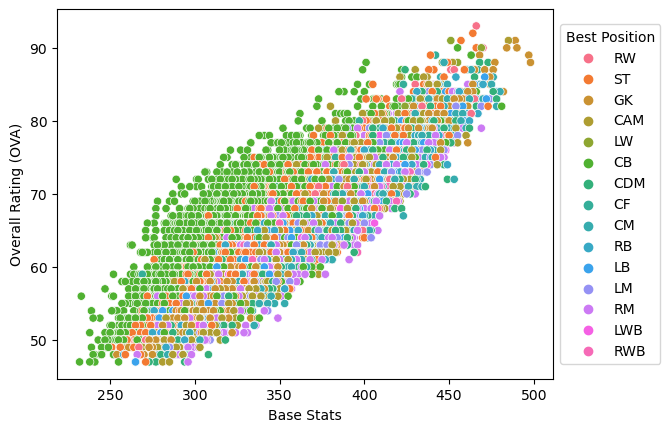

In [20]:
# How do players' overall rating (OVA) in different positions relate to their base stats (Base Stats = PAC + SHO + PAS + DRI + DEF + PHY)?
scatter = sns.scatterplot(x = 'Base Stats', y = 'OVA', data = df, hue = 'Best Position')
scatter.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), title = 'Best Position')
plt.xlabel('Base Stats')
plt.ylabel('Overall Rating (OVA)')
plt.show()

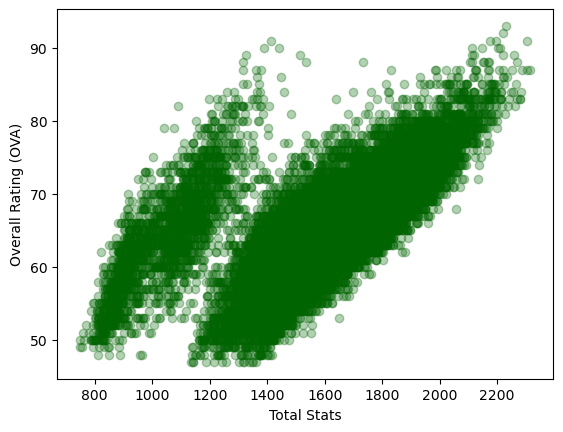

In [21]:
# How does a player's overall rating (OVA) relate to their total stats (Total Stats = Attacking + Skill + Movement + Power + Mentality + Defending + Goalkeeping)?
sns.regplot(x = 'Total Stats', y = 'OVA', data = df, scatter_kws = {'color' : 'darkgreen', 'alpha' : 0.3}, 
            line_kws = {'alpha' : 0}, ci = None)
plt.xlabel('Total Stats')
plt.ylabel('Overall Rating (OVA)')
plt.show()

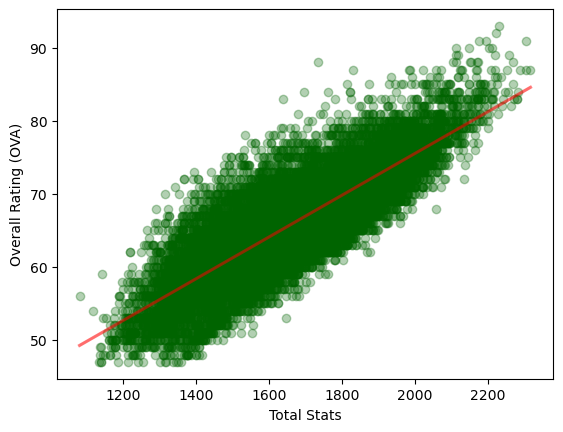

In [22]:
# How does a field player's overall rating (OVA) relate to their total stats (Total Stats = Attacking + Skill + Movement + Power + Mentality + Defending + Goalkeeping)?
field_players_df = df[df['Best Position'] != 'GK']
sns.regplot(x = 'Total Stats', y = 'OVA', data = field_players_df, scatter_kws = {'color' : 'darkgreen', 'alpha' : 0.3}, 
            line_kws = {'color' : 'red', 'alpha' : 0.5})
plt.xlabel('Total Stats')
plt.ylabel('Overall Rating (OVA)')
plt.show()

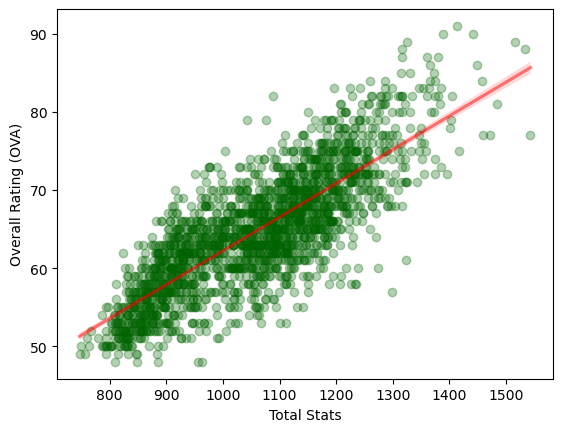

In [23]:
# How does a goalkeeper's overall rating (OVA) relate to their total stats (Total Stats = Attacking + Skill + Movement + Power + Mentality + Defending + Goalkeeping)?
goalkeepers_df = df[df['Best Position'] == 'GK']
sns.regplot(x = 'Total Stats', y = 'OVA', data = goalkeepers_df, scatter_kws = {'color' : 'darkgreen', 'alpha' : 0.3}, 
            line_kws = {'color' : 'red', 'alpha' : 0.5})
plt.xlabel('Total Stats')
plt.ylabel('Overall Rating (OVA)')
plt.show()

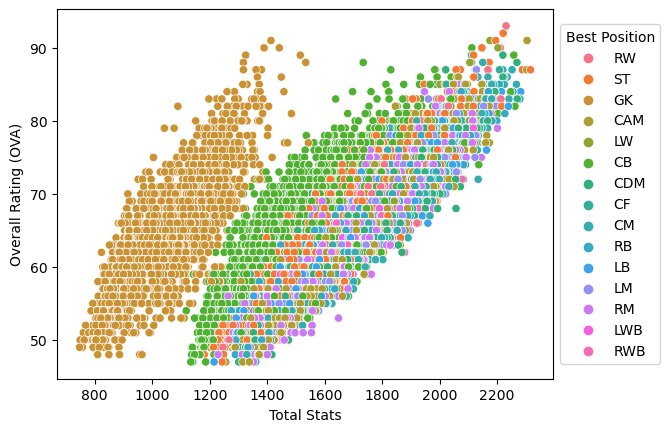

In [24]:
# How do players's overall rating (OVA) in different positions relate to their total stats (Total Stats = Attacking + Skill + Movement + Power + Mentality + Defending + Goalkeeping)?
scatter = sns.scatterplot(x = 'Total Stats', y = 'OVA', data = df, hue = 'Best Position')
scatter.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), title = 'Best Position')
plt.xlabel('Total Stats')
plt.ylabel('Overall Rating (OVA)')
plt.show()

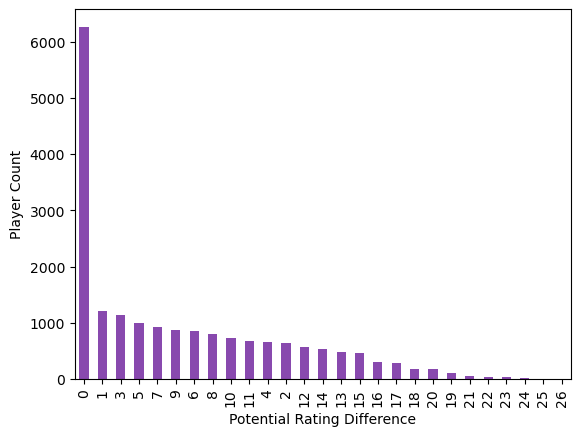

In [25]:
# Creating a bar chart of the distribution of difference between overall rating (OVA) and potential rating (POT)
difference_counts = df['Potential Rating Difference'].value_counts()
difference_counts.plot(kind = 'bar', color = '#6A1B9A', alpha = 0.8)
plt.xlabel('Potential Rating Difference')
plt.ylabel('Player Count')
plt.show()

In [26]:
# Finding the top twenty players with the largest difference between overall rating (OVA) and potential rating (POT)
highest_potential_players_df = df[['Name', 'Age', 'Nationality', 'Best Position', 'Club', 'Value', 'OVA', 'POT', 'Potential Rating Difference']].nlargest(20, 'Potential Rating Difference')
highest_potential_players_df

,Name,Age,Nationality,Best Position,Club,Value,OVA,POT,Potential Rating Difference
ID,,,,,,,,,
258315,Bright Akwo Arrey-Mbi,17,Germany,CB,Bayern München II,950000,60,86,26
257793,Rico Richards,16,England,LM,West Bromwich Albion,425000,54,80,26
259074,Albian Hajdari,17,Switzerland,CB,FC Basel 1893,350000,53,79,26
258490,Chadi Riad,17,Morocco,CB,CE Sabadell FC,675000,59,84,25
256832,Onurhan Babuscu,16,Austria,CAM,FC Admira Wacker Mödling,650000,58,83,25
257399,Wahid Faghir,16,Denmark,ST,Vejle Boldklub,650000,58,83,25
248856,Danny Leyva,17,United States,CAM,Seattle Sounders FC,450000,56,81,25
256598,Sondre Auklend,17,Norway,CAM,Viking FK,300000,53,78,25
247025,Tobias Fjeld Gulliksen,16,Norway,CAM,Strømsgodset IF,180000,51,76,25


In [27]:
# Inspecting the average age of the players with the largest difference between overall rating (OVA) and potential rating (POT)
all_players_age_average = round(df['Age'].mean(), 2)
highest_potential_players_age_average = round(highest_potential_players_df['Age'].mean(),  2)
print(f"Average age of all players: {all_players_age_average}")
print(f"Average age of high potential players: {highest_potential_players_age_average}")

Average age of all players: 25.19
Average age of high potential players: 16.8


In [28]:
# Finding players whose contracts are ending in the current year (2021 for the 2021 dataset), sorted by value
df.loc[df['Contract End'] == '2021', ['Name', 'Best Position', 'Club', 'Contract End', 'OVA', 'Value']].sort_values(by = 'Value', ascending = False)

,Name,Best Position,Club,Contract End,OVA,Value
ID,,,,,,
158023,Lionel Messi,RW,FC Barcelona,2021,93,103500000
230621,Gianluigi Donnarumma,GK,Milan,2021,85,93500000
153079,Sergio Agüero,ST,Manchester City,2021,89,83500000
195864,Paul Pogba,CM,Manchester United,2021,86,77500000
202556,Memphis Depay,CAM,Olympique Lyonnais,2021,85,71500000
...,...,...,...,...,...,...
2702,Kevin Ellison,ST,Newport County,2021,58,0
53352,Dannie Bulman,CDM,Crawley Town,2021,60,0
113524,Juan Francisco Martínez Modesto,ST,Elche CF,2021,70,0


In [29]:
# Finding the top 10 countries in the world in outputting total player value
df.groupby('Nationality')[['Value']].sum(numeric_only = True).sort_values(by = 'Value', ascending = False).head(10)

,Value
Nationality,
Spain,5646364995
Brazil,4888049997
France,4686989995
England,3896494999
Germany,3624914998
Argentina,3219279999
Portugal,2176415000
Italy,1962455000
Netherlands,1846194998


In [30]:
# Listing the clubs who pay their players the highest wages on average
df.groupby('Club')[['Wage']].mean(numeric_only = True).sort_values(by = 'Wage', ascending = False).head(10)

,Wage
Club,
Real Madrid,156233.333333
FC Barcelona,123727.272727
Manchester City,110272.727273
Liverpool,91772.727273
Manchester United,90484.848485
Inter,90192.307692
FC Bayern München,86043.478261
Chelsea,76787.878788
Paris Saint-Germain,75885.000000


In [31]:
# Listing the average heights of players at each position (tallest vs shortest positions?)
df.groupby('Best Position')[['Height']].mean(numeric_only = True).sort_values(by = 'Height', ascending = False).head(10)

,Height
Best Position,
GK,188.379277
CB,186.040695
ST,182.841418
CDM,180.157093
CM,179.220630
LB,178.388582
RB,178.112141
LWB,177.697318
RWB,177.444043
